In [316]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import pickle

In [317]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
# label encoder on gender
label_encoder_gender = LabelEncoder()
data['Sex'] = label_encoder_gender.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [319]:
# check nulls
null_counts = data.isnull().sum() / len(data) * 100
null_counts

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [320]:
# Code Generated by Sidekick is for learning and experimentation purposes only.
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)

In [321]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [322]:
# check nulls
null_counts = data.isnull().sum() / len(data) * 100
null_counts

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [323]:
# dropping unnessary columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,28.0,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


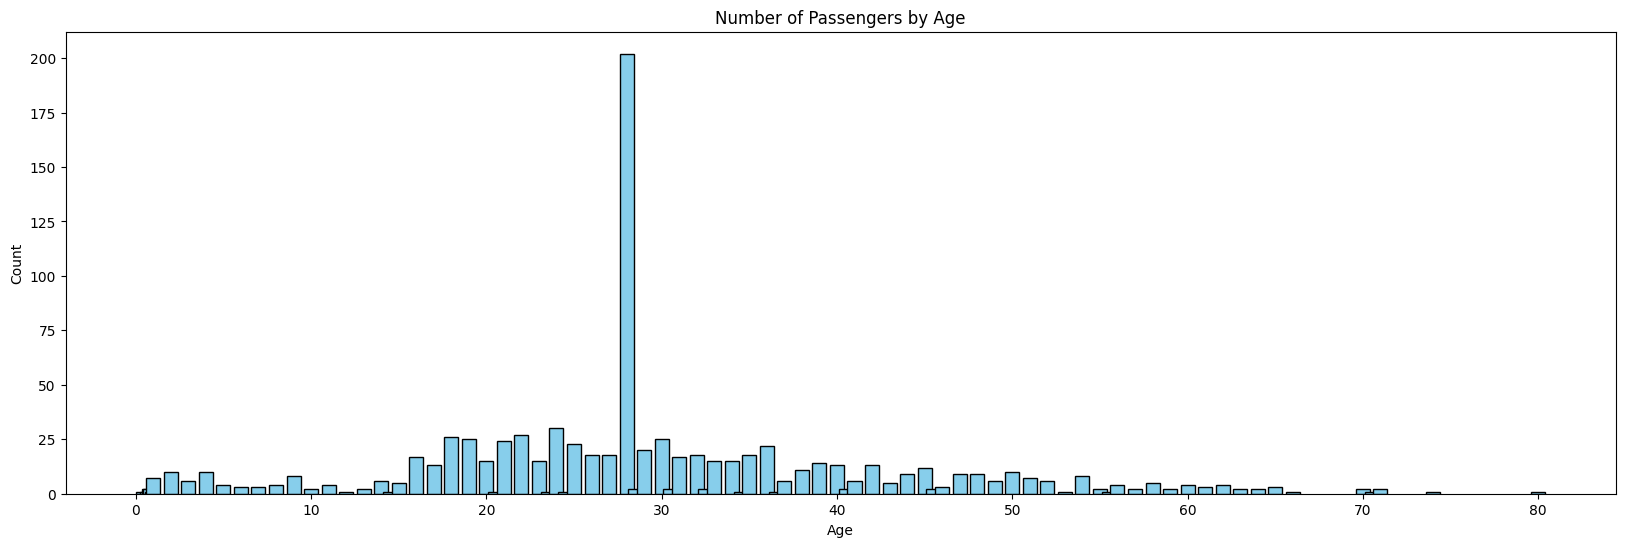

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline
# Code Generated by Sidekick is for learning and experimentation purposes only.
age_counts = data['Age'].value_counts().sort_index()
plt.figure(figsize=(20,6))
plt.bar(age_counts.index, age_counts.values, width=0.8, color='skyblue', edgecolor='black')
plt.title('Number of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



In [325]:
# Code Generated by Sidekick is for learning and experimentation purposes only.
num_missing_age = data['Age'].isnull().sum()
print(f"Number of passengers with missing Age: {num_missing_age}")


Number of passengers with missing Age: 0


In [326]:
data.dropna(subset=['Embarked'], inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,28.0,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [327]:
data.shape

(889, 9)

In [328]:
# apply one hot encoding on Embarked
ohe_embarked = OneHotEncoder(sparse_output=True)
embarked_encoder = ohe_embarked.fit_transform(data[['Embarked']])
embarked_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 889 stored elements and shape (889, 3)>

In [329]:
ohe_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [330]:
embarked_encoder.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(889, 3))

In [331]:
embarked_df = pd.DataFrame(embarked_encoder.toarray(), columns=ohe_embarked.get_feature_names_out(['Embarked']))
embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [332]:
# concatinate with the original dataset
# remove the exisitng embarked column

data = pd.concat([data.reset_index(drop=True), embarked_df], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,C123,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,NaN,S,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,B42,S,0.0,0.0,1.0
886,0,3,0,28.0,1,2,23.4500,NaN,S,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,C148,C,1.0,0.0,0.0


In [333]:
data.drop(['Embarked'], inplace=True, axis=1)

In [334]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,NaN,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,B42,0.0,0.0,1.0
886,0,3,0,28.0,1,2,23.4500,NaN,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,C148,1.0,0.0,0.0


In [335]:
# apply one hot encoding on cabin
ohe_cabin = OneHotEncoder(sparse_output=True)
cabin_encoder = ohe_cabin.fit_transform(data[['Cabin']])

cabin_df = pd.DataFrame(cabin_encoder.toarray(), columns=ohe_cabin.get_feature_names_out(['Cabin']))

data = pd.concat([data.reset_index(drop=True), cabin_df], axis=1)
data.drop(['Cabin'], inplace=True, axis=1)

In [336]:
# split into X_train Y_train
X = data.drop(['Survived'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale this X_train, X_test
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.87837838,  0.83380939, -0.04309939, ..., -0.13093073,
         0.        ,  0.56437445],
       [-1.52702703, -1.19931487, -1.18169455, ..., -0.13093073,
         0.        , -1.77187327],
       [ 0.87837838, -1.19931487, -1.18169455, ..., -0.13093073,
         0.        ,  0.56437445],
       ...,
       [ 0.87837838, -1.19931487,  0.77018286, ..., -0.13093073,
         0.        ,  0.56437445],
       [ 0.87837838, -1.19931487,  0.36354174, ..., -0.13093073,
         0.        ,  0.56437445],
       [ 0.87837838, -1.19931487, -1.9949768 , ...,  7.63762616,
         0.        , -1.77187327]], shape=(178, 156))

In [337]:
# saving the scaler, encoders, labelencoders
# save encoders and scaler
with open('label_encoder_titanic.pkl', 'wb') as f:
    pickle.dump(label_encoder_gender, f)

with open('onehot_encoder_geo_titanic.pkl', 'wb') as f:
    pickle.dump(ohe_embarked, f)

# saving scaler as pickle file
with open('scaler_titanic.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### ANN Classification Implementation

In [338]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from datetime import datetime

In [339]:
X_train.shape[0]

711

In [340]:
# creating the model
survival_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(32, activation='relu'), # Hidden Layer 2
    Dense(1, activation='sigmoid') #output layer
])

c:\Users\deepjroy\Desktop\Code\nlp-tutorial\env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [341]:
survival_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │        10,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
# compiling the model
survival_model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])

In [343]:
# set up tensorboard logging
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime 

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [344]:
# setup early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # wait till 5 epochs without improvement
# consider the best weights in between the epochs	

In [345]:
survival_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │        10,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [346]:
# training the model
history = survival_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    epochs=150,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5879 - loss: 0.7832 - val_accuracy: 0.6966 - val_loss: 0.6113
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6934 - loss: 0.6134 - val_accuracy: 0.6517 - val_loss: 0.6078
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6962 - loss: 0.5820 - val_accuracy: 0.7022 - val_loss: 0.5642
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7060 - loss: 0.5537 - val_accuracy: 0.7022 - val_loss: 0.5736
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7018 - loss: 0.5535 - val_accuracy: 0.7135 - val_loss: 0.5702
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7089 - loss: 0.5429 - val_accuracy: 0.7135 - val_loss: 0.5682
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7215 - loss: 0.5269 - val_accuracy: 0.7247 - val_loss: 0.5478
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7342 - loss: 0.5207 - val_accuracy: 0.7079 - 

In [347]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [348]:
# %tensorboard --logdir logs/fit --host localhost --port 6001

In [349]:
survival_model.save('survival_model.h5')

In [352]:
test_loss, test_mae = survival_model.evaluate(X_test, y_test)
print(f"test loss : {test_loss}")
print(f"test_mae : {test_mae}")
# X_test

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 0.4756 
test loss : 0.4755783975124359
test_mae : 0.8202247023582458
